In [2]:
import os
import random
import shutil
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import torch
import torchvision
from torchvision import transforms, datasets

In [4]:
data_dir = "/kaggle/input/covid19-radiography-dataset/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset"
class_names = os.listdir(data_dir)
class_names

['Normal', 'Lung_Opacity', 'Viral Pneumonia', 'COVID']

In [5]:
image_files = [[os.path.join(data_dir, class_name, x) 
               for x in os.listdir(os.path.join(data_dir, class_name))] 
               for class_name in class_names]
len(image_files)

4

In [6]:
image_file_list = []
image_label_list = []

for i, class_name in enumerate(class_names):
    image_file_list.extend(image_files[i])
    image_label_list.extend([i] * len(image_files[i]))
num_total = len(image_label_list)
num_total

21165

In [7]:
image_label_names = []
for i in range(len(image_label_list)):
    if image_label_list[i] == 0:
        image_label_names.append(class_names[0])    
    elif image_label_list[i] == 1:
        image_label_names.append(class_names[1])
    elif image_label_list[i] == 2:
        image_label_names.append(class_names[2])
    elif image_label_list[i] == 3:
        image_label_names.append(class_names[3])
image_label_names

['Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


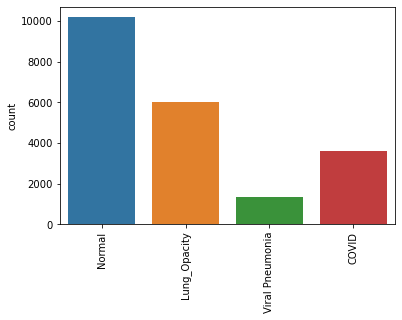

In [8]:
sx = sns.countplot(image_label_names)
sx.set_xticklabels(labels=sx.get_xticklabels(), rotation=90)
plt.show()

# for i in range(4):
#     print(class_names[i], len(image_files[i]))

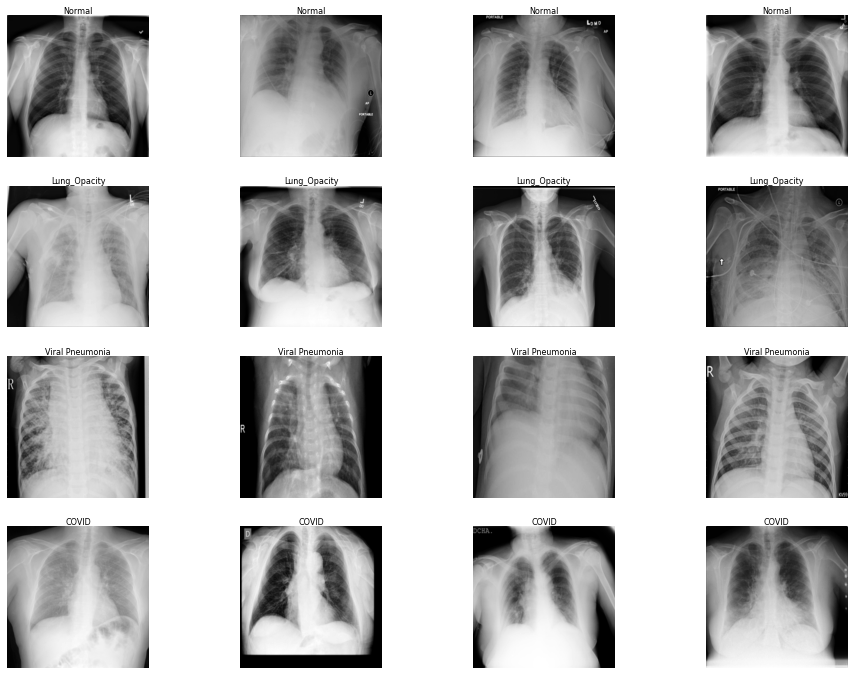

In [9]:
plt.figure(figsize=(16, 12))
for i in range(len(image_files)):
    for j in range(4):
        image = plt.imread(image_files[i][random.randint(0, len(image_files[i]))])
        plt.subplot(4, 4, i*4+j+1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(class_names[i], fontdict={'fontsize':8}, pad=1.5)

## Splitting Training, Validation, and Test datasets

## Preprocessing

### Creating train, val, and test folders

In [12]:
os.mkdir('dataset')
os.mkdir(os.path.join('dataset', 'train'))
os.mkdir(os.path.join('dataset', 'val'))
os.mkdir(os.path.join('dataset', 'test'))
for i in range(len(class_names)):
    os.mkdir(os.path.join('dataset', 'train', class_names[i]))
    os.mkdir(os.path.join('dataset', 'val', class_names[i]))
    os.mkdir(os.path.join('dataset', 'test', class_names[i]))
    for j in range(len(image_files[i])):
        rand = np.random.random()
        if rand < 0.1:
            shutil.copyfile(os.path.join(image_files[i][j]), os.path.join('dataset/val', class_names[i], f'{j}.png'))
        elif rand < 0.2:
            shutil.copyfile(os.path.join(image_files[i][j]), os.path.join('dataset/test', class_names[i], f'{j}.png'))
        else:
            shutil.copyfile(os.path.join(image_files[i][j]), os.path.join('dataset/train', class_names[i], f'{j}.png'))


In [11]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor()
])

In [13]:
train = datasets.ImageFolder(os.path.join('dataset', 'train'), transform=transform)
val = datasets.ImageFolder(os.path.join('dataset', 'val'), transform=transform)
test = datasets.ImageFolder(os.path.join('dataset', 'test'), transform=transform)

In [14]:
len(train), len(val), len(test)

(16957, 2114, 2094)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


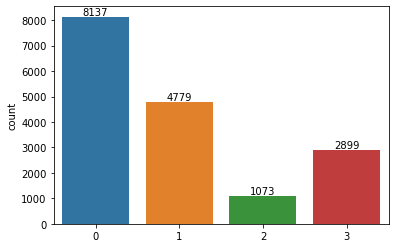

In [36]:
sx = sns.countplot(training_labels)
for container in sx.containers:
    sx.bar_label(container)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


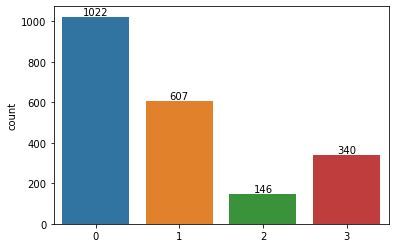

In [24]:
sx = sns.countplot(validation_labels)
for container in sx.containers:
    sx.bar_label(container)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


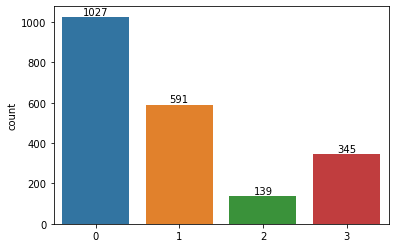

In [23]:
sx = sns.countplot(test_labels)
for container in sx.containers:
    sx.bar_label(container)

In [16]:
train_loader = torch.utils.data.DataLoader(train, batch_size=32)
val_loader = torch.utils.data.DataLoader(val, batch_size=32)
test_loader = torch.utils.data.DataLoader(test, batch_size=32)

In [17]:
len(train_loader), len(val_loader), len(test_loader)

(530, 67, 66)

## Building model

In [18]:
resnet = torchvision.models.resnet18(pretrained=True)
print(resnet)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [19]:
resnet.fc = torch.nn.Linear(in_features = 512, out_features = 4)
loss_fn     = torch.nn.CrossEntropyLoss()
optimizer   = torch.optim.Adam(resnet.parameters(), lr = 3e-5)

In [20]:
def training(epochs=1):
    for i in range(epochs):
        
        train_loss = 0
        val_loss = 0
        
        resnet.train()
        for train_step, (images, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = resnet(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            if train_step % 20 == 0:
                print("Evaluation at step", train_step)
                
                accuracy = 0
                resnet.eval()
                
                for val_step, (images, labels) in enumerate(test_loader):
                    outputs = resnet(images)
                    loss = loss_fn(outputs, labels)
                    val_loss += loss.item()
                    
                    _, preds = torch.max(outputs, 1)
                    accuracy += sum((preds == labels).numpy())
                
                val_loss /= (val_step + 1)
                accuracy = accuracy/len(val)
                print(f"Validatoin Loss: {val_loss:.4f}, Accuracy: {accuracy:.2f}")
                
                resnet.train()
                
                if accuracy >= 0.95:
                    print("performance condition satisfied")
                    return
            
        train_loss /= (train_step + 1)
        print(f"Training loss: {train_loss:.4f}")
    print("Training complete")

In [21]:
training(2)

Evaluation at step 0
Validatoin Loss: 1.4451, Accuracy: 0.18
Evaluation at step 20
Validatoin Loss: 1.6588, Accuracy: 0.17
Evaluation at step 40
Validatoin Loss: 2.0197, Accuracy: 0.17
Evaluation at step 60
Validatoin Loss: 2.2837, Accuracy: 0.17
Evaluation at step 80
Validatoin Loss: 2.6318, Accuracy: 0.17
Evaluation at step 100
Validatoin Loss: 2.8749, Accuracy: 0.17
Evaluation at step 120
Validatoin Loss: 2.5829, Accuracy: 0.17
Evaluation at step 140
Validatoin Loss: 1.9372, Accuracy: 0.29
Evaluation at step 160
Validatoin Loss: 2.4131, Accuracy: 0.28
Evaluation at step 180
Validatoin Loss: 2.7203, Accuracy: 0.28
Evaluation at step 200
Validatoin Loss: 2.9095, Accuracy: 0.28
Evaluation at step 220
Validatoin Loss: 3.0692, Accuracy: 0.28
Evaluation at step 240
Validatoin Loss: 3.1723, Accuracy: 0.28
Evaluation at step 260
Validatoin Loss: 2.1717, Accuracy: 0.28
Evaluation at step 280
Validatoin Loss: 1.2798, Accuracy: 0.47
Evaluation at step 300
Validatoin Loss: 1.5362, Accuracy: 0.4